In [ ]:
from google.colab import files
files.upload()

Saving g5_labeled_Sarcasm.csv to g5_labeled_Sarcasm.csv


{'g5_labeled_Sarcasm.csv': b'Text,Created At,Is Retweet,Language,User Location,"label (0:misinformation, 1: counter-misinformation, 2: irrelevant)","Is_Sarcasm (1: Not_Sarcasm, 2: Sarcasm)"\r\n"This is the top trump of tin foil hat conspiracy nonsense - coronavirus, chemtrails, vaccines, and 5G https://t.co/7b7dymSkUA",Fri Feb 28 22:16:24 +0000 2020,FALSE,en,"Gleann Rathais, Scotland",1,2\r\nIAM Platform Curated Tweet:  Social media conspiracies blame coronavirus on 5G internet   https://t.co/CIShmti0F2  #5G #Applications #CellPhone #Communications #FastInternet #InternetWP2TWTR1,Fri Feb 28 10:01:28 +0000 2020,FALSE,en,Worldwide,1,2\r\n@TechCrunch @bheater Conspiracy has it that this is the company that rolled out 5g in China and is the real cause of the #coronavirus ....interesting conspiracy,Fri Feb 28 05:04:38 +0000 2020,FALSE,en,"Michigan, USA",1,2\r\n"@jeannette_ng There\xe2\x80\x99s another that\xe2\x80\x99s raising its head now: conspiracy theories that deny Covid19 is a natural

In [ ]:
import pandas as pd
df = pd.read_csv('/content/g5_labeled_Sarcasm.csv')

In [ ]:
df.head()

,Text,Created At,Is Retweet,Language,User Location,"label (0:misinformation, 1: counter-misinformation, 2: irrelevant)","Is_Sarcasm (1: Not_Sarcasm, 2: Sarcasm)"
0,This is the top trump of tin foil hat conspira...,Fri Feb 28 22:16:24 +0000 2020,False,en,"Gleann Rathais, Scotland",1,2
1,IAM Platform Curated Tweet: Social media cons...,Fri Feb 28 10:01:28 +0000 2020,False,en,Worldwide,1,2
2,@TechCrunch @bheater Conspiracy has it that th...,Fri Feb 28 05:04:38 +0000 2020,False,en,"Michigan, USA",1,2
3,@jeannette_ng There’s another that’s raising i...,Fri Feb 28 22:56:06 +0000 2020,False,en,Traditional Chinook Land,1,2
4,So my bass teacher is an old hippie who very c...,Fri Feb 28 03:01:58 +0000 2020,False,en,"Washington, USA",1,2


In [ ]:
df = df.rename(columns={'label (0:misinformation, 1: counter-misinformation, 2: irrelevant)': 'is_misinformation', 'Is_Sarcasm (1: Not_Sarcasm, 2: Sarcasm)': 'is_sarcasm'})

In [ ]:
df.head()

,Text,Created At,Is Retweet,Language,User Location,is_misinformation,is_sarcasm
0,This is the top trump of tin foil hat conspira...,Fri Feb 28 22:16:24 +0000 2020,False,en,"Gleann Rathais, Scotland",1,2
1,IAM Platform Curated Tweet: Social media cons...,Fri Feb 28 10:01:28 +0000 2020,False,en,Worldwide,1,2
2,@TechCrunch @bheater Conspiracy has it that th...,Fri Feb 28 05:04:38 +0000 2020,False,en,"Michigan, USA",1,2
3,@jeannette_ng There’s another that’s raising i...,Fri Feb 28 22:56:06 +0000 2020,False,en,Traditional Chinook Land,1,2
4,So my bass teacher is an old hippie who very c...,Fri Feb 28 03:01:58 +0000 2020,False,en,"Washington, USA",1,2


In [ ]:
df = df.loc[df['is_misinformation'] != 2]

In [ ]:
count_is_misinformation_1 = (df['is_misinformation'] == 1).sum()

In [ ]:
count_is_misinformation_1

799

In [ ]:
count_is_misinformation_0 = (df['is_misinformation'] == 0).sum()
count_is_misinformation_0

791

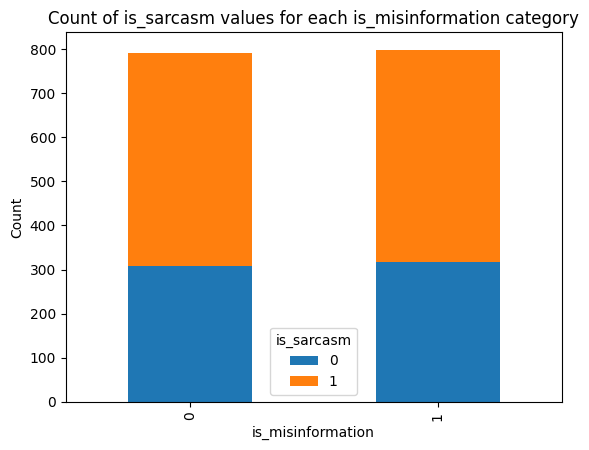

In [ ]:
import matplotlib.pyplot as plt

grouped_data = df.groupby(['is_misinformation', 'is_sarcasm']).size().unstack(fill_value=0)

# Plotting the bar chart
grouped_data.plot(kind='bar', stacked=True)
plt.xlabel('is_misinformation')
plt.ylabel('Count')
plt.title('Count of is_sarcasm values for each is_misinformation category')
plt.legend(title='is_sarcasm', labels=['0', '1'])
plt.show()

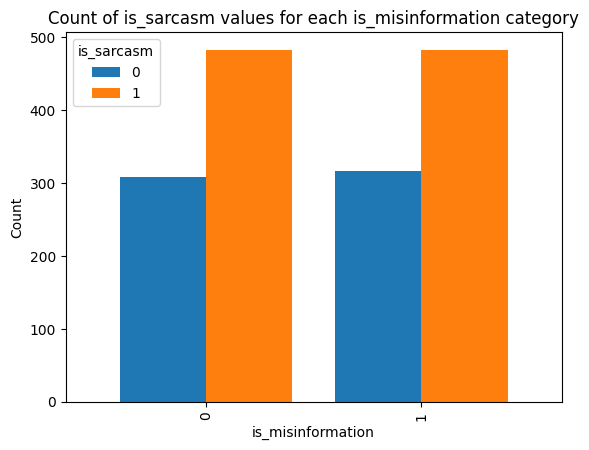

In [ ]:
grouped_data = df.groupby(['is_misinformation', 'is_sarcasm']).size().unstack(fill_value=0)

# Plotting the side-to-side bar chart
grouped_data.plot(kind='bar', width=0.8)
plt.xlabel('is_misinformation')
plt.ylabel('Count')
plt.title('Count of is_sarcasm values for each is_misinformation category')
plt.legend(title='is_sarcasm', labels=['0', '1'])
plt.show()

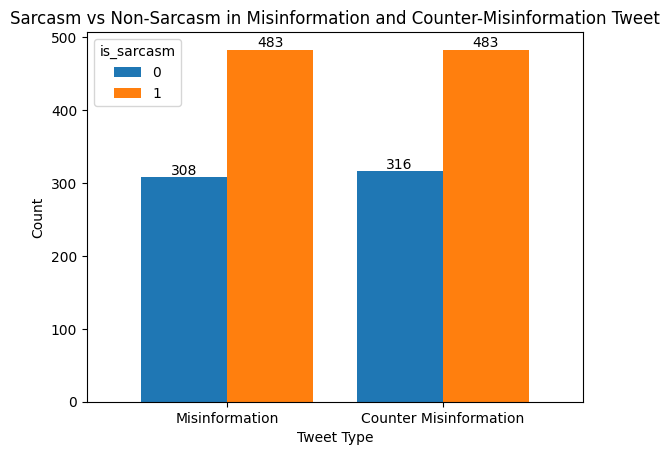

In [ ]:
grouped_data = df.groupby(['is_misinformation', 'is_sarcasm']).size().unstack(fill_value=0)

# Plotting the side-to-side bar chart with exact counts on top
ax = grouped_data.plot(kind='bar', width=0.8)
plt.xlabel('Tweet Type')
plt.ylabel('Count')
plt.title('Sarcasm vs Non-Sarcasm in Misinformation and Counter-Misinformation Tweet')
plt.legend(title='is_sarcasm', labels=['0', '1'])

custom_labels = ['Misinformation', 'Counter Misinformation']
plt.xticks(range(len(custom_labels)), custom_labels, rotation=0)

# Add exact counts on top of the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

In [ ]:
mis_sarcasm = df[(df['is_misinformation'] == 0) & (df['is_sarcasm'] == 2)]
mis_non_sarcasm = df[(df['is_misinformation'] == 0) & (df['is_sarcasm'] == 1)]
counter_sarcasm = df[(df['is_misinformation'] == 1) & (df['is_sarcasm'] == 2)]
counter_non_sarcasm = df[(df['is_misinformation'] == 1) & (df['is_sarcasm'] == 1)]

In [ ]:
print(len(mis_sarcasm))
print(len(mis_non_sarcasm))
print(len(counter_sarcasm))
print(len(counter_non_sarcasm))

483
308
483
316


In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
mis_sarcasm_sent_score = {
    'neg': 0,
    'neu': 0,
    'pos': 0,
    'compound': 0
}

mis_sarcasm_corpus = mis_sarcasm["Text"].dropna().tolist()
for sentence in mis_sarcasm_corpus:
    score = sia.polarity_scores(sentence)
    mis_sarcasm_sent_score['neg'] += score['neg']
    mis_sarcasm_sent_score['neu'] += score['neu']
    mis_sarcasm_sent_score['pos'] += score['pos']
    mis_sarcasm_sent_score['compound'] += score['compound']

mis_sarcasm_sent_score['neg'] /= len(mis_sarcasm_corpus)
mis_sarcasm_sent_score['neu'] /= len(mis_sarcasm_corpus)
mis_sarcasm_sent_score['pos'] /= len(mis_sarcasm_corpus)
mis_sarcasm_sent_score['compound'] /= len(mis_sarcasm_corpus)
print(mis_sarcasm_sent_score)

{'neg': 0.08965631469979297, 'neu': 0.8623002070393372, 'pos': 0.04804554865424432, 'compound': -0.16321739130434787}


In [ ]:
mis_non_sarcasm_sent_score = {
    'neg': 0,
    'neu': 0,
    'pos': 0,
    'compound': 0
}

mis_non_sarcasm_corpus = mis_non_sarcasm["Text"].dropna().tolist()
for sentence in mis_non_sarcasm_corpus:
    score = sia.polarity_scores(sentence)
    mis_non_sarcasm_sent_score['neg'] += score['neg']
    mis_non_sarcasm_sent_score['neu'] += score['neu']
    mis_non_sarcasm_sent_score['pos'] += score['pos']
    mis_non_sarcasm_sent_score['compound'] += score['compound']

mis_non_sarcasm_sent_score['neg'] /= len(mis_non_sarcasm_corpus)
mis_non_sarcasm_sent_score['neu'] /= len(mis_non_sarcasm_corpus)
mis_non_sarcasm_sent_score['pos'] /= len(mis_non_sarcasm_corpus)
mis_non_sarcasm_sent_score['compound'] /= len(mis_non_sarcasm_corpus)
print(mis_non_sarcasm_sent_score)

{'neg': 0.07861363636363633, 'neu': 0.8585941558441549, 'pos': 0.06279220779220777, 'compound': -0.07853376623376625}


In [ ]:
counter_sarcasm_sent_score = {
    'neg': 0,
    'neu': 0,
    'pos': 0,
    'compound': 0
}

counter_sarcasm_corpus = counter_sarcasm["Text"].dropna().tolist()
for sentence in counter_sarcasm_corpus:
    score = sia.polarity_scores(sentence)
    counter_sarcasm_sent_score['neg'] += score['neg']
    counter_sarcasm_sent_score['neu'] += score['neu']
    counter_sarcasm_sent_score['pos'] += score['pos']
    counter_sarcasm_sent_score['compound'] += score['compound']

counter_sarcasm_sent_score['neg'] /= len(counter_sarcasm_corpus)
counter_sarcasm_sent_score['neu'] /= len(counter_sarcasm_corpus)
counter_sarcasm_sent_score['pos'] /= len(counter_sarcasm_corpus)
counter_sarcasm_sent_score['compound'] /= len(counter_sarcasm_corpus)
print(counter_sarcasm_sent_score)

{'neg': 0.17953416149068324, 'neu': 0.7803478260869562, 'pos': 0.040105590062111805, 'compound': -0.41142857142857187}


In [ ]:
counter_non_sarcasm_sent_score = {
    'neg': 0,
    'neu': 0,
    'pos': 0,
    'compound': 0
}

counter_non_sarcasm_corpus = counter_non_sarcasm["Text"].dropna().tolist()
for sentence in counter_non_sarcasm_corpus:
    score = sia.polarity_scores(sentence)
    counter_non_sarcasm_sent_score['neg'] += score['neg']
    counter_non_sarcasm_sent_score['neu'] += score['neu']
    counter_non_sarcasm_sent_score['pos'] += score['pos']
    counter_non_sarcasm_sent_score['compound'] += score['compound']

counter_non_sarcasm_sent_score['neg'] /= len(counter_non_sarcasm_corpus)
counter_non_sarcasm_sent_score['neu'] /= len(counter_non_sarcasm_corpus)
counter_non_sarcasm_sent_score['pos'] /= len(counter_non_sarcasm_corpus)
counter_non_sarcasm_sent_score['compound'] /= len(counter_non_sarcasm_corpus)
print(counter_non_sarcasm_sent_score)

{'neg': 0.1632278481012659, 'neu': 0.7838164556962028, 'pos': 0.05293987341772155, 'compound': -0.34744968354430356}


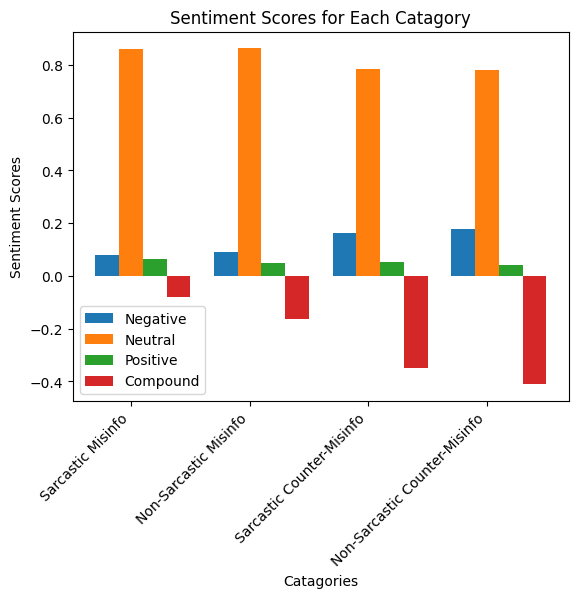

In [ ]:
sent_score_list = [mis_non_sarcasm_sent_score, mis_sarcasm_sent_score, counter_non_sarcasm_sent_score, counter_sarcasm_sent_score]

# Extract the keys and values for each sentiment category
categories = ['neg', 'neu', 'pos', 'compound']
values_list = [[d[category] for d in sent_score_list] for category in categories]

# Plotting the bar chart
bar_width = 0.2
fig, ax = plt.subplots()

legend_names = ['Negative', 'Neutral', 'Positive', 'Compound']

for i, category in enumerate(categories):
    x_values = [j + i * bar_width for j in range(len(sent_score_list))]
    ax.bar(x_values, values_list[i], width=bar_width, label=legend_names[i])

ax.set_xticks([j + bar_width for j in range(len(sent_score_list))])
ax.set_xticklabels(['Sarcastic Misinfo', 'Non-Sarcastic Misinfo', 'Sarcastic Counter-Misinfo', 'Non-Sarcastic Counter-Misinfo'], rotation=45, ha='right')
ax.legend()

plt.xlabel('Catagories')
plt.ylabel('Sentiment Scores')
plt.title('Sentiment Scores for Each Catagory')
plt.show()

In [ ]:
import io
import pandas as pd
label1 = pd.read_csv(io.StringIO('''
NOT_SARCASM
SARCASM
NOT_SARCASM
NOT_SARCASM
NOT_SARCASM
SARCASM
SARCASM
SARCASM
NOT_SARCASM
NOT_SARCASM
SARCASM
SARCASM
NOT_SARCASM
NOT_SARCASM
SARCASM
SARCASM
SARCASM
NOT_SARCASM
SARCASM
SARCASM
SARCASM
NOT_SARCASM
SARCASM
NOT_SARCASM
NOT_SARCASM
NOT_SARCASM
NOT_SARCASM
NOT_SARCASM
SARCASM
SARCASM
NOT_SARCASM
SARCASM
SARCASM
NOT_SARCASM
SARCASM
NOT_SARCASM
SARCASM
SARCASM
SARCASM
NOT_SARCASM
NOT_SARCASM
NOT_SARCASM
SARCASM
NOT_SARCASM
NOT_SARCASM
NOT_SARCASM
SARCASM
SARCASM
NOT_SARCASM
NOT_SARCASM
SARCASM
NOT_SARCASM
SARCASM
NOT_SARCASM
SARCASM
NOT_SARCASM
SARCASM
NOT_SARCASM
SARCASM
NOT_SARCASM
NOT_SARCASM
SARCASM
NOT_SARCASM
SARCASM
NOT_SARCASM
SARCASM
SARCASM
NOT_SARCASM
NOT_SARCASM
SARCASM
SARCASM
NOT_SARCASM
SARCASM
NOT_SARCASM
SARCASM
NOT_SARCASM
SARCASM
SARCASM
NOT_SARCASM
NOT_SARCASM
SARCASM
SARCASM
NOT_SARCASM
NOT_SARCASM
SARCASM
NOT_SARCASM
NOT_SARCASM
SARCASM
NOT_SARCASM
SARCASM
NOT_SARCASM
NOT_SARCASM
SARCASM
NOT_SARCASM
SARCASM
NOT_SARCASM
SARCASM
SARCASM
SARCASM
NOT_SARCASM
'''), header=None)


In [ ]:
import io
import pandas as pd
label2 = pd.read_csv(io.StringIO('''
NOT_SARCASM
SARCASM
NOT_SARCASM
SARCASM
NOT_SARCASM
NOT_SARCASM
SARCASM
SARCASM
NOT_SARCASM
NOT_SARCASM
SARCASM
SARCASM
NOT_SARCASM
NOT_SARCASM
SARCASM
NOT_SARCASM
SARCASM
NOT_SARCASM
SARCASM
SARCASM
NOT_SARCASM
NOT_SARCASM
SARCASM
NOT_SARCASM
NOT_SARCASM
NOT_SARCASM
NOT_SARCASM
NOT_SARCASM
SARCASM
SARCASM
NOT_SARCASM
SARCASM
SARCASM
NOT_SARCASM
SARCASM
NOT_SARCASM
SARCASM
SARCASM
SARCASM
NOT_SARCASM
SARCASM
NOT_SARCASM
SARCASM
NOT_SARCASM
NOT_SARCASM
NOT_SARCASM
SARCASM
SARCASM
NOT_SARCASM
NOT_SARCASM
NOT_SARCASM
NOT_SARCASM
SARCASM
NOT_SARCASM
SARCASM
NOT_SARCASM
SARCASM
NOT_SARCASM
SARCASM
NOT_SARCASM
NOT_SARCASM
NOT_SARCASM
NOT_SARCASM
SARCASM
NOT_SARCASM
SARCASM
SARCASM
NOT_SARCASM
NOT_SARCASM
SARCASM
NOT_SARCASM
NOT_SARCASM
SARCASM
NOT_SARCASM
SARCASM
NOT_SARCASM
SARCASM
SARCASM
NOT_SARCASM
NOT_SARCASM
SARCASM
SARCASM
NOT_SARCASM
NOT_SARCASM
SARCASM
NOT_SARCASM
NOT_SARCASM
SARCASM
NOT_SARCASM
SARCASM
SARCASM
NOT_SARCASM
NOT_SARCASM
SARCASM
SARCASM
NOT_SARCASM
NOT_SARCASM
SARCASM
SARCASM
NOT_SARCASM
'''), header=None)


In [ ]:
label1[0] = label1[0].replace({"SARCASM": 1, "NOT_SARCASM": 0})
label2[0] = label2[0].replace({"SARCASM": 1, "NOT_SARCASM": 0})


In [ ]:
label1.head()

,0
0,0
1,1
2,0
3,0
4,0


In [ ]:
from sklearn.metrics import cohen_kappa_score

In [ ]:
kappa = cohen_kappa_score(label1, label2)

In [ ]:
kappa

0.7595190380761523